Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler, LabelEncoder,RobustScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib.lines import Line2D
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost')



Loading Datasets

In [3]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Check and Clean Duplicated Value

In [4]:
print(df.duplicated().sum())

3854


In [5]:
df = df.drop_duplicates().reset_index(drop=True)

In [6]:
print(df.duplicated().sum())

0


Check and Clean Inconsistent Value

In [7]:
df['gender'].value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

In [8]:
df['gender'].replace('Other','Female',inplace=True)

C:\Users\andro\AppData\Local\Temp\ipykernel_28580\175388984.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Other','Female',inplace=True)


In [9]:
df['heart_disease'].value_counts()

heart_disease
0    92223
1     3923
Name: count, dtype: int64

In [10]:
df['smoking_history'].value_counts()

smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [11]:
df['hypertension'].value_counts()

hypertension
0    88685
1     7461
Name: count, dtype: int64

EDA

In [12]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96141,Female,36.0,0,0,No Info,24.60,4.8,145,0
96142,Female,2.0,0,0,No Info,17.37,6.5,100,0
96143,Male,66.0,0,0,former,27.83,5.7,155,0
96144,Female,24.0,0,0,never,35.42,4.0,100,0
96145,Female,57.0,0,0,current,22.43,6.6,90,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96146 entries, 0 to 96145
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.6+ MB


In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Simple EDA

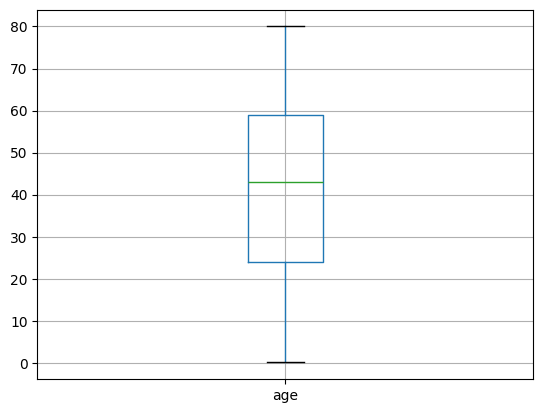

In [15]:
boxplot = df.boxplot(column=['age'])
plt.show()

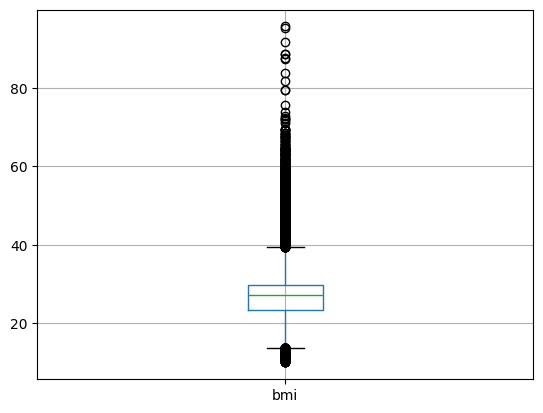

In [16]:
boxplot = df.boxplot(column=['bmi'])
plt.show()

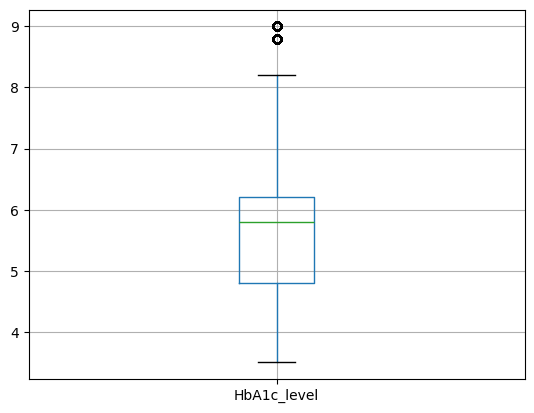

In [17]:
boxplot = df.boxplot(column=['HbA1c_level'])
plt.show()

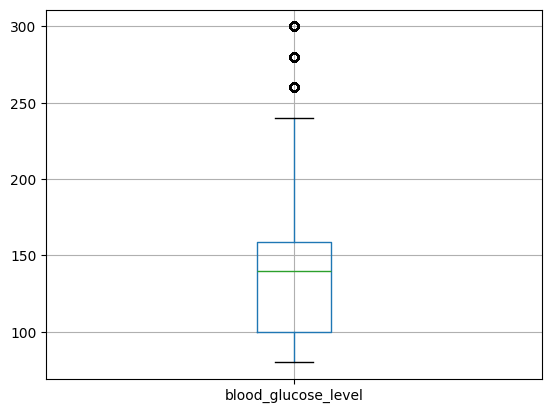

In [18]:
boxplot = df.boxplot(column=['blood_glucose_level'])
plt.show()

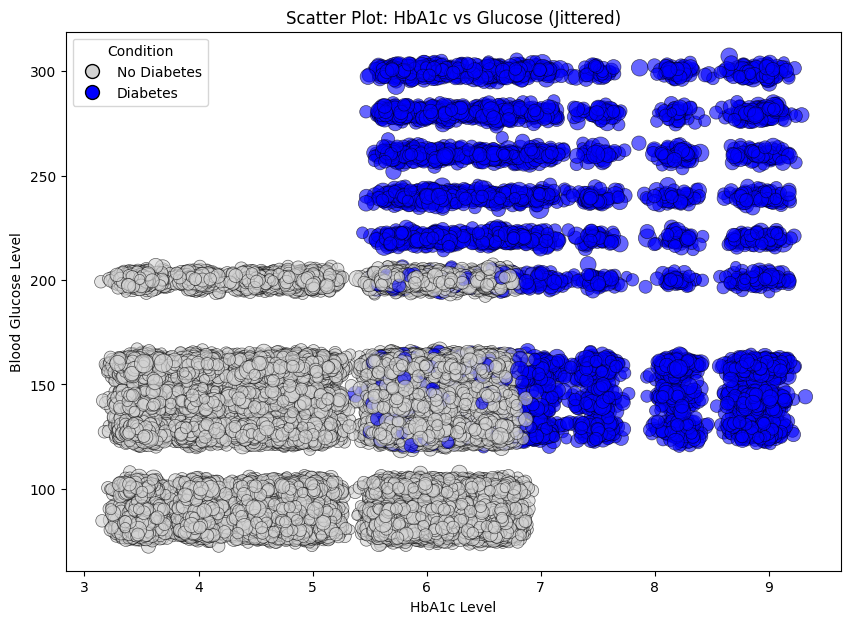

In [19]:

colors = df['diabetes'].map({1: 'blue', 0: 'lightgray'})
x_jitter = df['HbA1c_level'] + np.random.normal(0, 0.1, size=len(df))
y_jitter = df['blood_glucose_level'] + np.random.normal(0, 2, size=len(df))

plt.figure(figsize=(10, 7))

plt.scatter(
    x_jitter,             
    y_jitter,             
    s=df['bmi'] * 3,      
    c=colors,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.6             
)

plt.xlabel("HbA1c Level")
plt.ylabel("Blood Glucose Level")
plt.title("Scatter Plot: HbA1c vs Glucose (Jittered)")

legend_elements = [Line2D([0], [0], marker='o', color='w', label='No Diabetes',
                          markerfacecolor='lightgray', markersize=10, markeredgecolor='black'),
                   Line2D([0], [0], marker='o', color='w', label='Diabetes',
                          markerfacecolor='blue', markersize=10, markeredgecolor='black')]
plt.legend(handles=legend_elements, title="Condition")

plt.show()

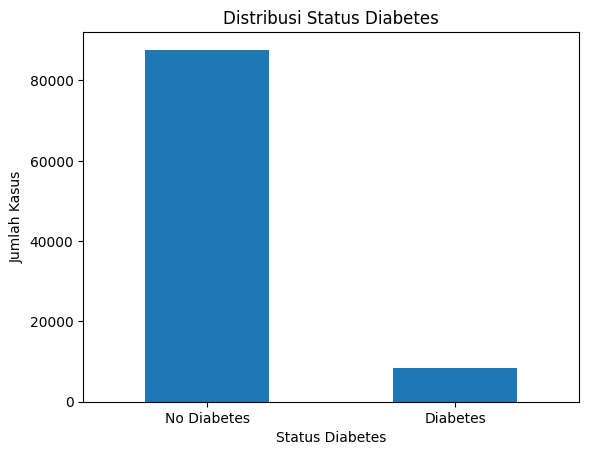

In [20]:
barplot = df['diabetes'].value_counts().plot(
    kind='bar',

)

new_labels = ['No Diabetes', 'Diabetes']
barplot.set_xticklabels(new_labels, rotation=0)
plt.title('Distribusi Status Diabetes')
plt.xlabel('Status Diabetes')
plt.ylabel('Jumlah Kasus')
plt.show()

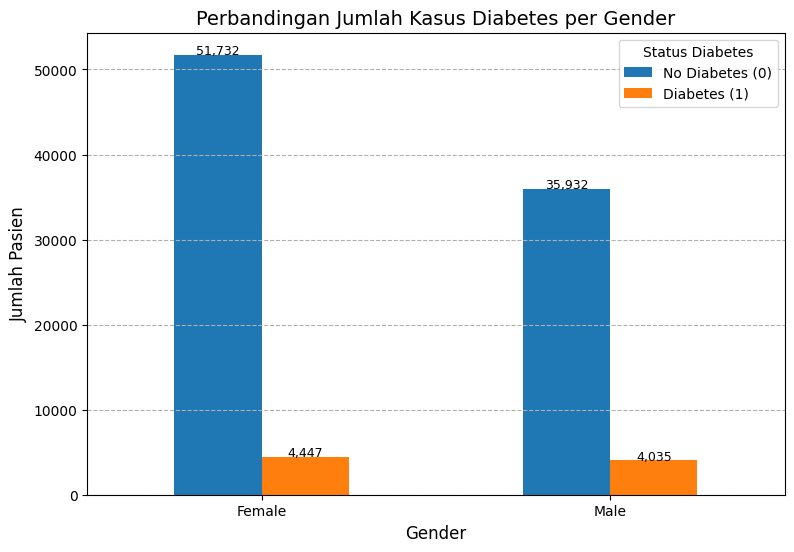

In [21]:

gender_diabetes_counts = pd.crosstab(
    df['gender'],
    df['diabetes']
)
ax = gender_diabetes_counts.plot(
    kind='bar',
    figsize=(9, 6)
)
plt.title('Perbandingan Jumlah Kasus Diabetes per Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Diabetes', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 50, 
        f'{int(p.get_height()):,}', 
        ha='center',
        fontsize=9
    )

plt.show()

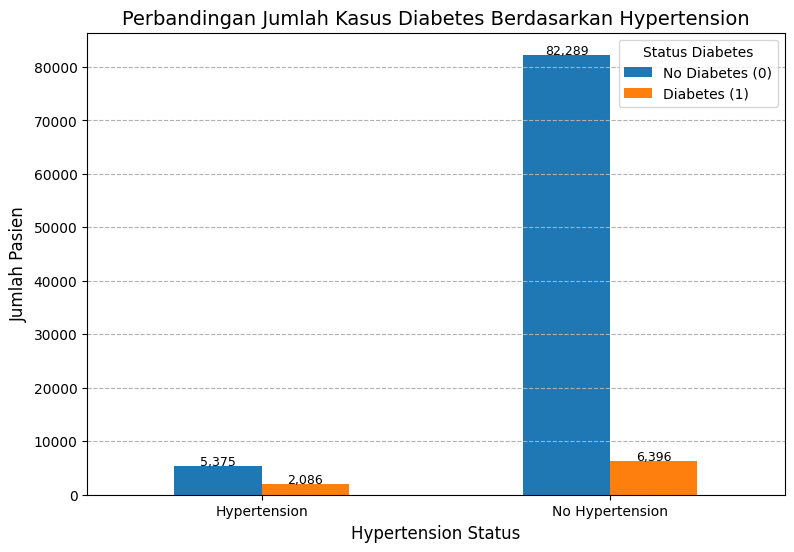

In [22]:

hyper_df = pd.DataFrame({
    'hypertension_label': df['hypertension'].map({
        0: 'No Hypertension',
        1: 'Hypertension'
    }),
    'diabetes': df['diabetes']
})

hyper_diabetes_counts = pd.crosstab(
    hyper_df['hypertension_label'],
    hyper_df['diabetes']
)


ax = hyper_diabetes_counts.plot(
    kind='bar',
    figsize=(9, 6)
)

plt.title('Perbandingan Jumlah Kasus Diabetes Berdasarkan Hypertension', fontsize=14)
plt.xlabel('Hypertension Status', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Diabetes', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 50,
        f'{int(p.get_height()):,}',
        ha='center',
        fontsize=9
    )

plt.show()


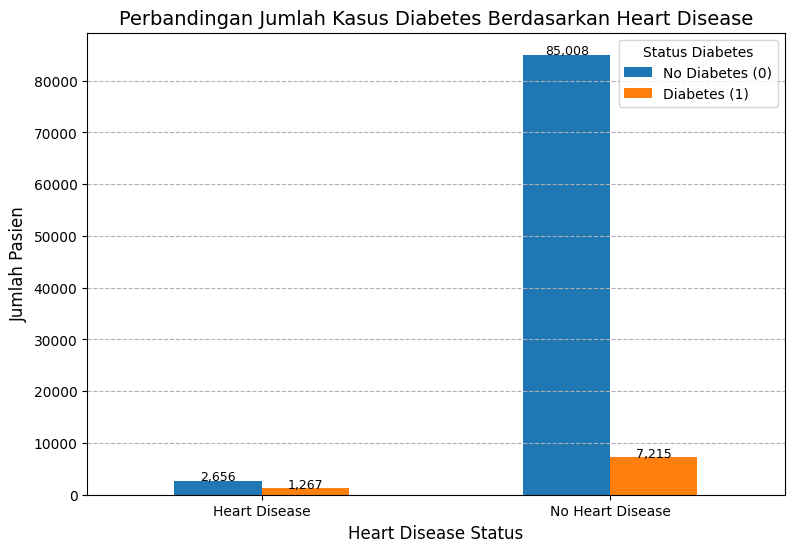

In [23]:

heart_df = pd.DataFrame({
    'heart_disease_label': df['heart_disease'].map({
        0: 'No Heart Disease',
        1: 'Heart Disease'
    }),
    'diabetes': df['diabetes']
})


heart_diabetes_counts = pd.crosstab(
    heart_df['heart_disease_label'],
    heart_df['diabetes']
)


ax = heart_diabetes_counts.plot(
    kind='bar',
    figsize=(9, 6)
)

plt.title('Perbandingan Jumlah Kasus Diabetes Berdasarkan Heart Disease', fontsize=14)
plt.xlabel('Heart Disease Status', fontsize=12)
plt.ylabel('Jumlah Pasien', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Diabetes', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y', linestyle='--')


for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 50,
        f'{int(p.get_height()):,}',
        ha='center',
        fontsize=9
    )

plt.show()


Total Diabetes cases vs Non-Diabetes per Smoking History:
diabetes             0     1
smoking_history             
No Info          31442  1445
current           8249   948
ever              3526   472
former            7709  1590
never            31061  3337
not current       5677   690


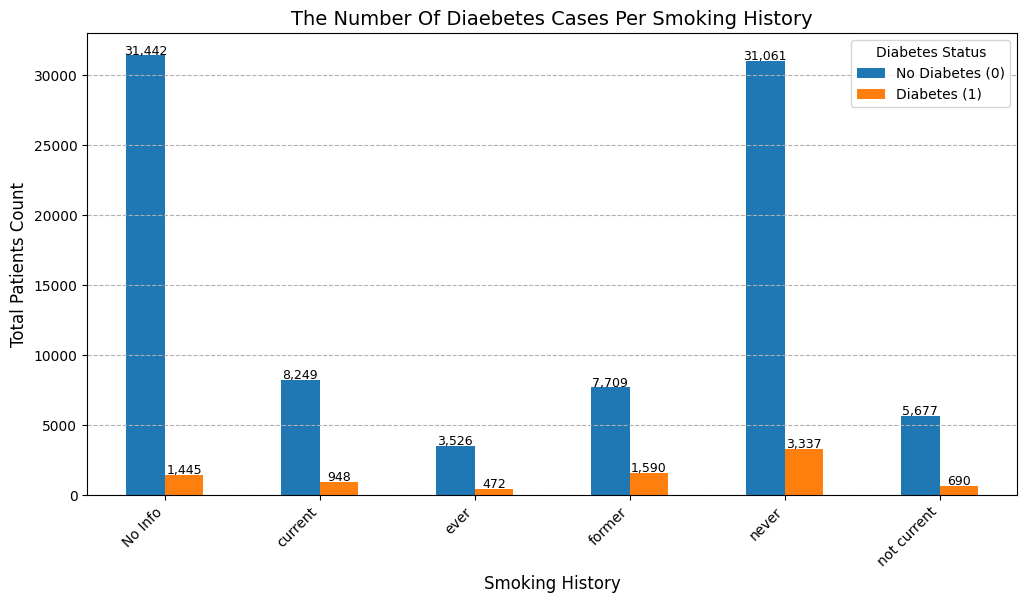

In [24]:
smoking_diabetes_counts = pd.crosstab(
    df['smoking_history'],
    df['diabetes']
)

print("Total Diabetes cases vs Non-Diabetes per Smoking History:")
print(smoking_diabetes_counts)

ax = smoking_diabetes_counts.plot(
    kind='bar',
    figsize=(12, 6) 
)


plt.title('The Number Of Diaebetes Cases Per Smoking History', fontsize=14)
plt.xlabel('Smoking History', fontsize=12)
plt.ylabel('Total Patients Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y', linestyle='--')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2.,
        p.get_height() + 50,
        f'{int(p.get_height()):,}',
        ha='center',
        fontsize=9
    )

plt.show()

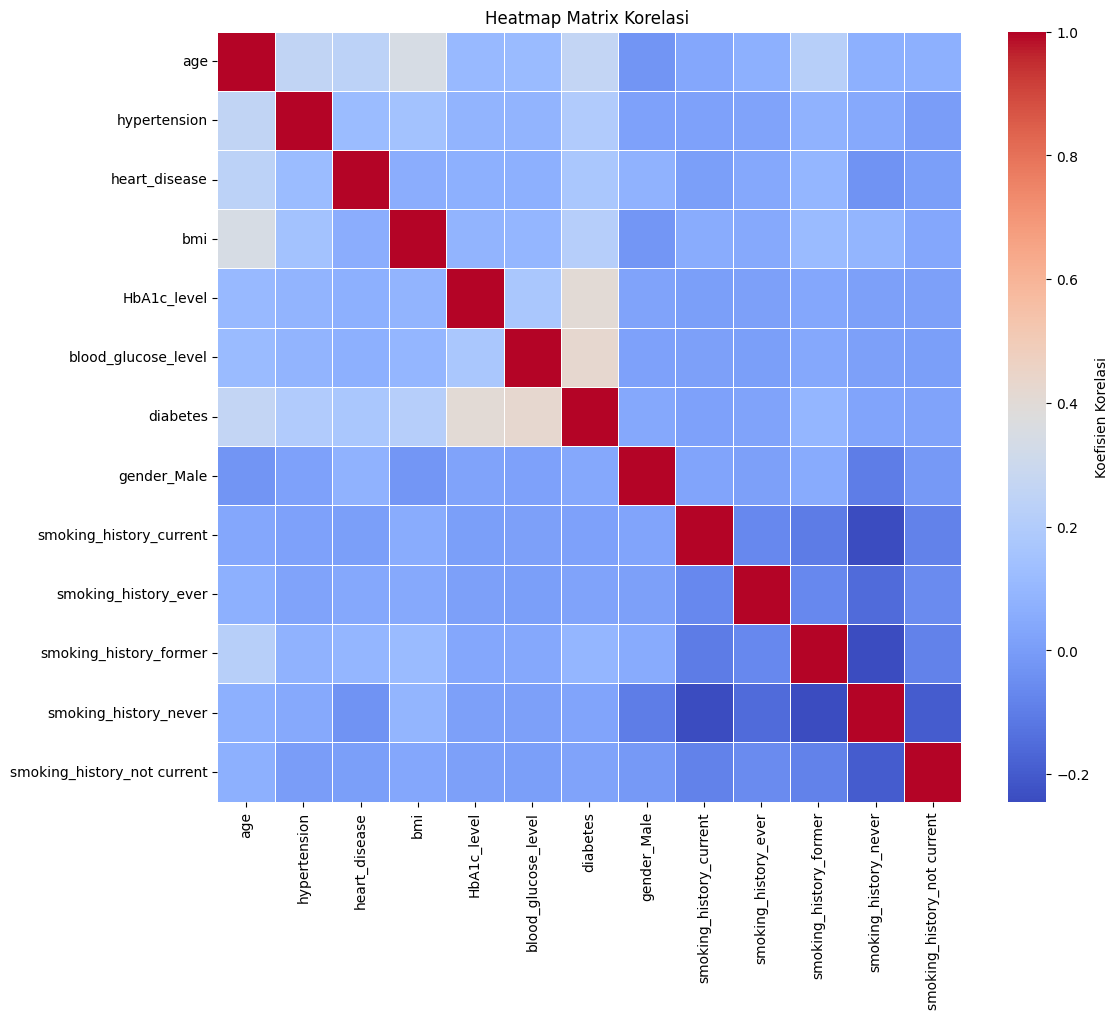

In [25]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10)) 
sns.heatmap(
    correlation_matrix,
    annot=False, 
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Koefisien Korelasi'}
)
plt.title('Heatmap Matrix Korelasi ')
plt.show()

Splitting Dataset

In [26]:
x = df.drop('diabetes',axis=1)
y=df['diabetes']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

Checking and Handling Missing Values

In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76916 entries, 76484 to 33005
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               76916 non-null  object 
 1   age                  76916 non-null  float64
 2   hypertension         76916 non-null  int64  
 3   heart_disease        76916 non-null  int64  
 4   smoking_history      76916 non-null  object 
 5   bmi                  76916 non-null  float64
 6   HbA1c_level          76916 non-null  float64
 7   blood_glucose_level  76916 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 5.3+ MB


In [29]:
x_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [30]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19230 entries, 79323 to 51447
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               19230 non-null  object 
 1   age                  19230 non-null  float64
 2   hypertension         19230 non-null  int64  
 3   heart_disease        19230 non-null  int64  
 4   smoking_history      19230 non-null  object 
 5   bmi                  19230 non-null  float64
 6   HbA1c_level          19230 non-null  float64
 7   blood_glucose_level  19230 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.3+ MB


In [31]:
x_test.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

Use Pipeline 

In [32]:
y_train.value_counts()

diabetes
0    70130
1     6786
Name: count, dtype: int64

In [33]:
numerical_columns_with_outlier = ['bmi','HbA1c_level','blood_glucose_level']
numerical_columns_without_outlier = ['age']
binary_columns = ['gender','hypertension','heart_disease']


In [34]:
preprocessor = ColumnTransformer(
    transformers = [
        ('binary', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), binary_columns),
        ('robust', RobustScaler(), numerical_columns_with_outlier),
        ('standard', StandardScaler(), numerical_columns_without_outlier)
    ]
)

In [35]:

mapping = {
    'never': 0,
    'former': 1,
    'current': 2,
    'not current': 3,
    'ever': 4,
    'No Info' : -1
}

x_train['smoking_history'] = x_train['smoking_history'].map(mapping)
x_test['smoking_history'] = x_test['smoking_history'].map(mapping)

Xgboost Base Model

In [36]:
xgboost_base = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
     eval_metric='logloss'
)

In [37]:
pipeline1 = Pipeline([
    ('preprocess', preprocessor),
    ('xgboost', xgboost_base)
])

In [38]:
pipeline1.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('xgboost', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binary', ...), ('robust', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred = pipeline1.predict(x_test)

Confusion Matrix:

                      Predicted: Non-Diabetic  Predicted: Diabetic
Actual: Non-Diabetic                    17527                    7
Actual: Diabetic                          536                 1160

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     17534
    Diabetic       0.99      0.68      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230

Accuracy: 0.9718


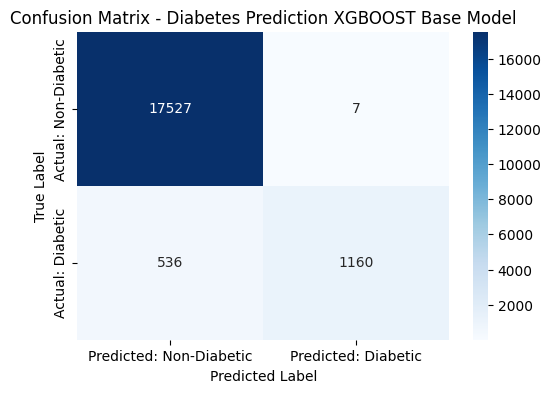

In [40]:
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, 
                     index=['Actual: Non-Diabetic', 'Actual: Diabetic'], 
                     columns=['Predicted: Non-Diabetic', 'Predicted: Diabetic'])

print("Confusion Matrix:\n")
print(cm_df)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Diabetes Prediction XGBOOST Base Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AUROC: 0.8418


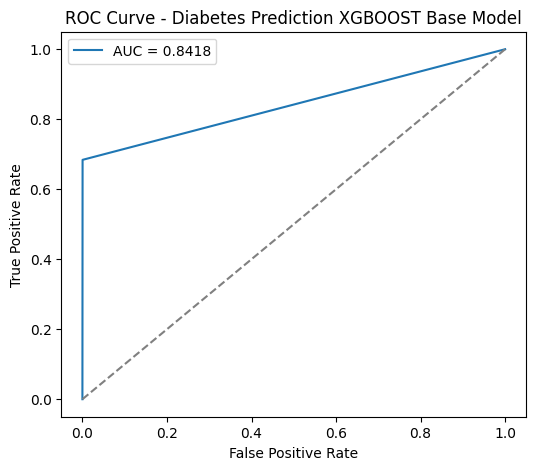

In [41]:
auroc = roc_auc_score(y_test, y_pred)
print("\nAUROC:", round(auroc, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction XGBOOST Base Model')
plt.legend()
plt.show()

MLP Base Model

In [42]:
mlp_base = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

In [43]:
pipeline2 = Pipeline([
    ('preprocess', preprocessor),
    ('mlp', mlp_base)
])

In [44]:
pipeline2.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('mlp', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binary', ...), ('robust', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [45]:
y_pred = pipeline2.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.96      0.69      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.97      0.85      0.90     19230
weighted avg       0.97      0.97      0.97     19230



Confusion Matrix:

                      Predicted: Non-Diabetic  Predicted: Diabetic
Actual: Non-Diabetic                    17487                   47
Actual: Diabetic                          519                 1177

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      1.00      0.98     17534
    Diabetic       0.96      0.69      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.97      0.85      0.90     19230
weighted avg       0.97      0.97      0.97     19230

Accuracy: 0.9706


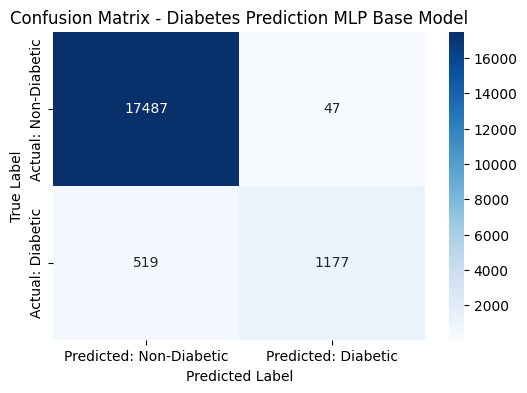

In [47]:
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, 
                     index=['Actual: Non-Diabetic', 'Actual: Diabetic'], 
                     columns=['Predicted: Non-Diabetic', 'Predicted: Diabetic'])

print("Confusion Matrix:\n")
print(cm_df)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Diabetes Prediction MLP Base Model')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AUROC: 0.8457


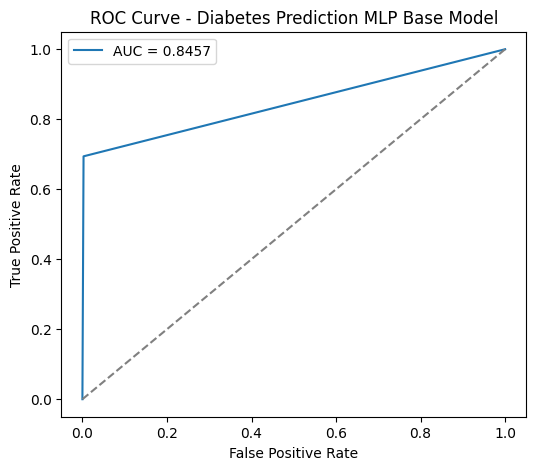

In [48]:
auroc = roc_auc_score(y_test, y_pred)
print("\nAUROC:", round(auroc, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction MLP Base Model')
plt.legend()
plt.show()

Stacked XGBOOST + MLP (BASE MODEL)

In [49]:
stack_model = StackingClassifier(
    estimators=[
        ('xgb', XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=4,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'
        )),
        ('mlp', MLPClassifier(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            max_iter=300,
            random_state=42
        ))
    ],
    final_estimator=LogisticRegression()
)

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('stack', stack_model)
])

In [50]:
pipeline.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('stack', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('binary', ...), ('robust', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
y_pred = pipeline.predict(x_test)

In [52]:
print(accuracy_score(y_test,y_pred))

0.9697347893915756


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17534
           1       0.93      0.71      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230



In [54]:
print(confusion_matrix(y_pred,y_test))

[[17443   491]
 [   91  1205]]


Confusion Matrix:

                      Predicted: Non-Diabetic  Predicted: Diabetic
Actual: Non-Diabetic                    17443                   91
Actual: Diabetic                          491                 1205

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98     17534
    Diabetic       0.93      0.71      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Accuracy: 0.9697


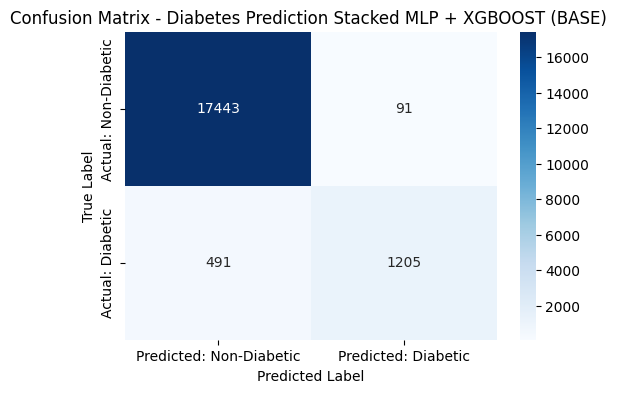

In [55]:
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, 
                     index=['Actual: Non-Diabetic', 'Actual: Diabetic'], 
                     columns=['Predicted: Non-Diabetic', 'Predicted: Diabetic'])

print("Confusion Matrix:\n")
print(cm_df)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Diabetes Prediction Stacked MLP + XGBOOST (BASE) ')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AUROC: 0.8527


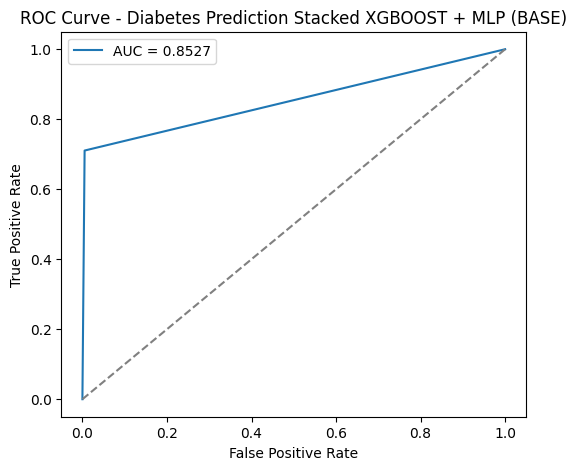

In [56]:
auroc = roc_auc_score(y_test, y_pred)
print("\nAUROC:", round(auroc, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction Stacked XGBOOST + MLP (BASE)')
plt.legend()
plt.show()

Hyperparameter Tuning XGBOOST + MLP

In [ ]:
param_distributions = {
    'stack__xgb__n_estimators': [100, 150],
    'stack__xgb__learning_rate': [0.1, 0.05],
    'stack__xgb__max_depth': [4, 6],

    'stack__mlp__hidden_layer_sizes': [
        (100, 50),
        (128, 64),
        (64, 32)
    ],
    'stack__mlp__max_iter' : [100,200,300]

}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=5,              
    scoring='roc_auc',      
    cv=3,
    verbose=3,
    random_state=42,
    n_jobs=1
)

In [59]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 1/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.977 total time= 3.9min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 2/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.976 total time= 4.5min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 3/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.977 total time= 3.7min
[CV 1/3] END stack__mlp__hidden_layer_sizes=(64, 32), stack__mlp__max_iter=200, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=6, stack__xgb__n_estimators=100;, score=0.978 total time= 2.0min
[CV 2/3] END stack__mlp__hidden_layer_sizes=(64, 32), stack__mlp__max_iter=200, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=6, stack__xgb__n_estimators=100;, score=0.977 total time= 1.4min
[CV 3/3] END stack__mlp__hidden_layer_sizes=(64, 32), stack__mlp__max_iter=200, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=6, stack__xgb__n_estimators=100;, score=0.978 total time= 1.9min
[CV 1/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=300, stack__xgb__learning_rate=0.1, stack__xgb__max_depth=6, stack__xgb__n_estimators=100;, score=0.979 total time= 6.4min
[CV 

c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 1/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.1, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.979 total time= 2.5min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 2/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.1, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.978 total time= 2.7min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 3/3] END stack__mlp__hidden_layer_sizes=(100, 50), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.1, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.979 total time= 2.8min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 1/3] END stack__mlp__hidden_layer_sizes=(128, 64), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.977 total time= 4.9min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 2/3] END stack__mlp__hidden_layer_sizes=(128, 64), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.976 total time= 4.7min


c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\andro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

[CV 3/3] END stack__mlp__hidden_layer_sizes=(128, 64), stack__mlp__max_iter=100, stack__xgb__learning_rate=0.05, stack__xgb__max_depth=4, stack__xgb__n_estimators=100;, score=0.977 total time= 6.5min


,estimator,Pipeline(step...gression()))])
,param_distributions,"{'stack__mlp__hidden_layer_sizes': [(100, ...), (128, ...), ...], 'stack__mlp__max_iter': [100, 200, ...], 'stack__xgb__learning_rate': [0.1, 0.05], 'stack__xgb__max_depth': [4, 6], ...}"
,n_iter,5
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,3
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
best_model = random_search.best_estimator_
print("Best params:")
print(random_search.best_params_)

Best params:
{'stack__xgb__n_estimators': 100, 'stack__xgb__max_depth': 6, 'stack__xgb__learning_rate': 0.1, 'stack__mlp__max_iter': 300, 'stack__mlp__hidden_layer_sizes': (100, 50)}


In [61]:
y_pred = best_model.predict(x_test)

Confusion Matrix:

                      Predicted: Non-Diabetic  Predicted: Diabetic
Actual: Non-Diabetic                    17445                   89
Actual: Diabetic                          491                 1205

Classification Report:

              precision    recall  f1-score   support

Non-Diabetic       0.97      0.99      0.98     17534
    Diabetic       0.93      0.71      0.81      1696

    accuracy                           0.97     19230
   macro avg       0.95      0.85      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Accuracy: 0.9698


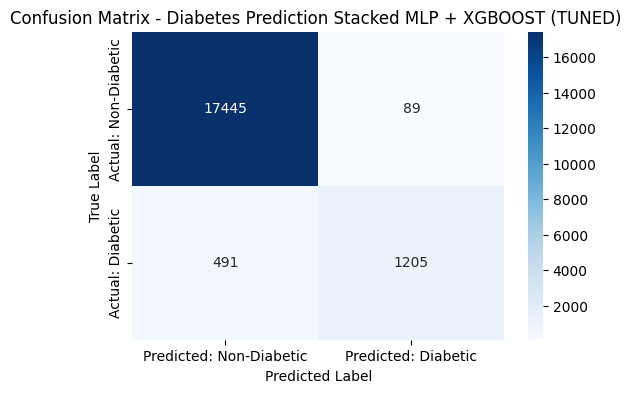

In [62]:
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, 
                     index=['Actual: Non-Diabetic', 'Actual: Diabetic'], 
                     columns=['Predicted: Non-Diabetic', 'Predicted: Diabetic'])

print("Confusion Matrix:\n")
print(cm_df)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Non-Diabetic', 'Diabetic']))

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
plt.figure(figsize=(6,4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Diabetes Prediction Stacked MLP + XGBOOST (TUNED) ')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AUROC: 0.8527


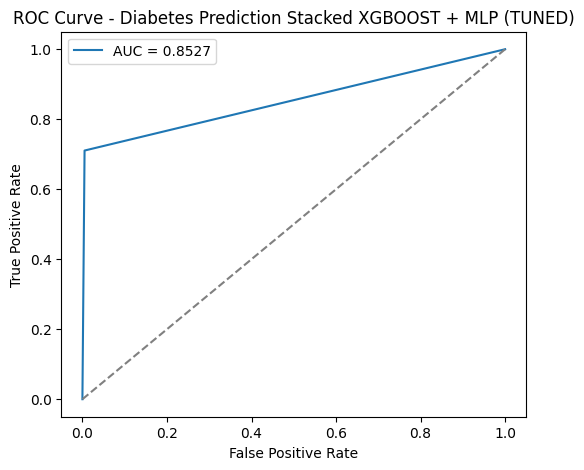

In [63]:
auroc = roc_auc_score(y_test, y_pred)
print("\nAUROC:", round(auroc, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auroc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Diabetes Prediction Stacked XGBOOST + MLP (TUNED)')
plt.legend()
plt.show()